In [ ]:
# Disclaimer:
# 
# THIS IS NOT MEDICAL OR SCIENTIFIC INFORMATION. 
# I AM NOT A DOCTOR OR EPIDEMIOLOGIST.
# 
# The notebooks and code in this repository are meant 
# to explore and illustrate exponential growth, and the 
# effect of different variables (such as growth rates) on 
# that growth.  Both the information about the virus, as 
# well as the mathematics, or other info could be incorrect, 
# out of date, or otherwise wrong.  
# 
# Please refer to public health officials or a medical doctor
# for accurate information about the virus as it actually 
# pertains to reality.

In [216]:
# states:
UNINFECTED = 0
INFECTED = 1
RECOVERED = 3
DEAD = 4

# parameters:
RECOVERY_TIME = 21
INFECTION_CHANCE = .5
DEATH_CHANCE = .02
GRID_SIZE = 20
INITIAL_INFECTED = 1
DAYS_TO_SIMULATE = 100

In [217]:
from attr import attrs, attrib
import random

@attrs
class Person:
    status = attrib(default=UNINFECTED)
    infection_days = attrib(default=0)
    _becoming_infected = attrib(default=False)
    
    def become_infected(self):
        if self.status is UNINFECTED:
            self._becoming_infected=True
            
    def infect_neighbors(self, neighbors):
        if self.status is INFECTED:
            for neighbor in neighbors:
                if random.random() < INFECTION_CHANCE:
                    neighbor.become_infected()
                    
    def progression_step(self):
        if self.status in (DEAD, RECOVERED):
            return
        
        if self._becoming_infected:
            self.status = INFECTED
            infection_days = 0
            self._becoming_infected = False
        
        if self.status is INFECTED:
            self.infection_days += 1
            
        if self.infection_days >= RECOVERY_TIME:
            if random.random() < DEATH_CHANCE:
                self.status = DEAD
            else:
                self.status = RECOVERED
                
    def __str__(self):
        return {
            UNINFECTED: '😀',
            INFECTED: '🤢',
            RECOVERED: '😎',
            DEAD: '💀'
            
        }[self.status]
                
class Grid:
    def __init__(self, size):
        self.rows = [[Person(status=UNINFECTED) 
                      for _ in range(GRID_SIZE)] 
                         for _ in range(GRID_SIZE)]
    
    def print(self):
        for row in self.rows:
            print("".join([str(person) for person in row]))
            
    def stats(self):
        stats = {
            UNINFECTED: 0,
            INFECTED: 0,
            RECOVERED: 0,
            DEAD: 0,
        }
        for row in self.rows:
            for person in row:
                stats[person.status] += 1
        return stats
    
    def people(self):
        for column in range(GRID_SIZE):
            for row in range(GRID_SIZE):
                neighbor_indices = grid_neighbors(column, row)
                person = self.rows[row][column]
                neighbors = [self.rows[row][column] for column, row in neighbor_indices]
                yield column, row, person, neighbors
                
    def step(self, num_steps=1):
        for _ in range(num_steps):
            for column, row, person, neighbors in self.people():
                person.infect_neighbors(neighbors)

            for column, row, person, neighbors in self.people():
                person.progression_step()
                
def grid_neighbors(column, row):
    neighbors = []
    if row > 0:
        neighbors.append((column, row - 1))
    if column > 0:
        neighbors.append((column - 1, row))
    if row < GRID_SIZE - 1:
        neighbors.append((column, row + 1))
    if column < GRID_SIZE - 1:
        neighbors.append((column + 1, row))
    return neighbors
        
# print(grid_neighbors(0, 0))
# print(grid_neighbors(GRID_SIZE - 1, GRID_SIZE - 1))

In [218]:
# set up the grid
grid = Grid(GRID_SIZE)
_mid_cell = GRID_SIZE // 2
grid.rows[_mid_cell][_mid_cell].status = INFECTED


In [219]:
# do a step or steps manually for debugging etc.
# grid.step()
# grid.print()

In [220]:
def tupleize_grid_stats(stats):
    return (
        stats[UNINFECTED], 
        stats[INFECTED], 
        stats[DEAD], 
        stats[RECOVERED]
    )

rows = []
rows.append(tupleize_grid_stats(grid.stats()))
for _ in range(DAYS_TO_SIMULATE):
    grid.step()
    rows.append(tupleize_grid_stats(grid.stats()))

In [221]:
import matplotlib.pyplot as plt

In [222]:
def do_plot(rows, ylabel="number", yscale=None):
    plt.plot(rows)
    plt.xlabel("day")
    plt.ylabel(ylabel)
    line_labels = [
        "uninfected", 
        "infected", 
        "dead", 
        "recovered"
    ]
    plt.legend(line_labels)
    if yscale:
        plt.yscale(yscale)
    plt.show()

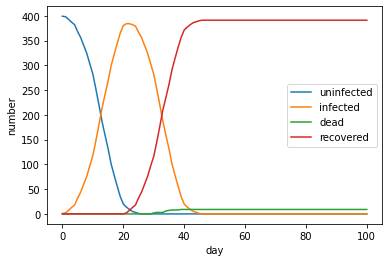

In [223]:
do_plot(rows)

In [224]:
#for row in rows: print(row)

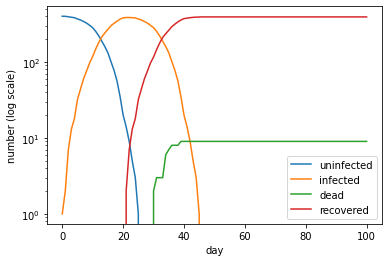

In [225]:
do_plot(rows, ylabel="number (log scale)", yscale="log")